In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify, unpatchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects YT/Dubai Dataset'

total 33K
-rw------- 1 root root  548 Jun 26 05:50  classes.json
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 1'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 2'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 3'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 4'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 5'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 6'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 7'
drwx------ 2 root root 4.0K Jun 26 07:06 'Tile 8'


In [5]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects YT/'
dataset_name = 'Dubai Dataset'

In [6]:
for path,subdirs,files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == "images":
    images = os.listdir(path)
    for i,image in enumerate(images):
      if (image.endswith('.jpg')):
        print(image)

image_part_005.jpg
image_part_003.jpg
image_part_002.jpg
image_part_008.jpg
image_part_001.jpg
image_part_006.jpg
image_part_009.jpg
image_part_007.jpg
image_part_004.jpg
image_part_001.jpg
image_part_002.jpg
image_part_005.jpg
image_part_009.jpg
image_part_004.jpg
image_part_003.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_007.jpg
image_part_004.jpg
image_part_005.jpg
image_part_001.jpg
image_part_009.jpg
image_part_008.jpg
image_part_006.jpg
image_part_003.jpg
image_part_002.jpg
image_part_005.jpg
image_part_009.jpg
image_part_001.jpg
image_part_008.jpg
image_part_006.jpg
image_part_004.jpg
image_part_007.jpg
image_part_003.jpg
image_part_002.jpg
image_part_005.jpg
image_part_009.jpg
image_part_003.jpg
image_part_008.jpg
image_part_004.jpg
image_part_007.jpg
image_part_006.jpg
image_part_001.jpg
image_part_002.jpg
image_part_004.jpg
image_part_001.jpg
image_part_003.jpg
image_part_007.jpg
image_part_009.jpg
image_part_002.jpg
image_part_008.jpg
image_part_0

In [7]:
image_patch_size = 256

In [8]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_005.jpg')

In [9]:
patched_image = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
print(patched_image.shape)


(2, 1, 1, 256, 256, 3)


In [10]:
minmaxscaler = MinMaxScaler()
image_x = patched_image[0,0,:,:]

# print(image_x.shape[-1])
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,1)).reshape(image_x.shape)
print(image_y[0].shape)

(256, 256, 3)


In [11]:
image = Image.fromarray(image)
print(type(image))
print(image)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=510x544 at 0x7F4CE85CB820>


In [12]:
files = os.scandir(dataset_root_folder+dataset_name+"/Tile 1/images")
print(len([file for file in files]))

9


In [13]:
image = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
# print(help(patchify))
print(image[1][3])
patches = patchify(image, (2,2), step=3) # split image into 2*3 small 2*2 patches.
print(type(patches))
print(patches.shape)
# assert patches.shape == (2, 3, 2, 2)
# reconstructed_image = unpatchify(patches, image.shape)

# assert (reconstructed_image == image).all()

8
<class 'numpy.ndarray'>
(1, 1, 2, 2)


In [14]:
image_patch_size = 256


image  = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_005.jpg')
patched_image  = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
print(type(patched_image[0,0,0,:]))

<class 'numpy.ndarray'>


In [15]:
# newImage = np.reshape(image,(-1,2))
# print(newImage)

array = []
array.append(1)
array.append("yes")
print(array)


[1, 'yes']


In [16]:
minmaxscaler = MinMaxScaler()
image_patch_size = 256
image_dataset = []
mask_dataset = []
for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  else:
    image_extension = 'png'

  for tile_id in range(1,8):

    for image_id in range(1,20):

      image = cv2.imread(f'{dataset_root_folder}{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
      if image is not None:

        if image_type == 'masks':
          image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        # making the size multiple of pat
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        # print(f'{image.shape} - {size_x},{size_y}')

        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        image = np.array(image)

        patched_images = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

        for i in range(patched_images.shape[0]):

          for j in range(patched_images.shape[1]):

            if image_type == 'images':
              current_patched_image = patched_images[i,j,0,:]
              current_patched_image = minmaxscaler.fit_transform(current_patched_image.reshape(-1,1)).reshape(current_patched_image.shape)
              image_dataset.append(current_patched_image)
            else:
              current_patched_mask = patched_images[i,j,0,:]
              mask_dataset.append(current_patched_mask)



In [17]:
image_dataset  = np.array(image_dataset)
mask_dataset  = np.array(mask_dataset)

print(type(image_dataset))
print(type(mask_dataset))

print(image_dataset[0].shape)
print(mask_dataset[0].shape)

print(type(image_dataset[0]))




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
<class 'numpy.ndarray'>


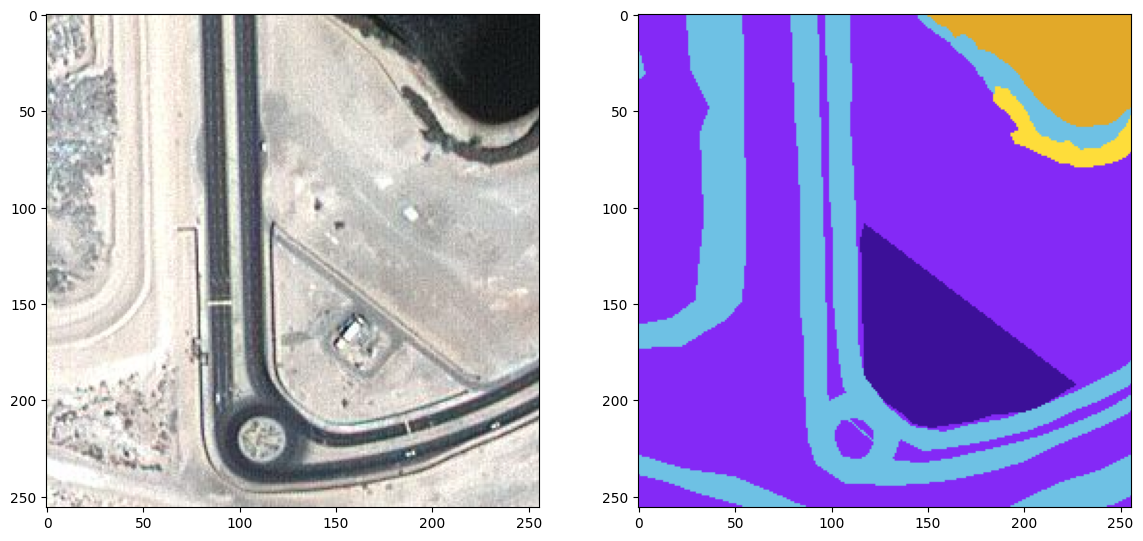

In [18]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8)) #width height
plt.subplot(121) #numRows numColumns Position
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [19]:
class_building  = '#3C1098'.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_building)

class_land  = '#8429F6'.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_land)

class_road  = '#6EC1E4'.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_road)

class_vegetation  = '#FEDD3A'.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_vegetation)

class_water  = '#E2A929'.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_water)

class_unlabelled  = '#9B9B9B'.lstrip('#')
class_unlabelled = np.array(tuple(int(class_unlabelled[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_unlabelled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [20]:
print(mask_dataset.shape)
arr = [[1,2,3],[1,5,3]]
print(np.unique(arr))
labl = np.array([1,2,3])
print(labl)
print(arr==labl)
np.all(arr==labl,axis=-1)

(945, 256, 256, 3)
[1 2 3 5]
[1 2 3]
[[ True  True  True]
 [ True False  True]]


array([ True, False])

In [21]:
print(np.all([[True,True,False],[False,True,True]],axis=-1))

[False False]


label == class_water will generate a matrix of shape 256 * 256 * 3 that will contain true or false values.
Since class_water is of shape 1*3, every cell will have same values at the third dimension i.e either all true or all false.

np.all function will return you a two vector of 256 * 256 with true or false. At those indexes I will mark the labelsegment of respective mask

In [22]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype = np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabelled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [23]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [24]:
print(len(labels))
print(labels[0].shape)
print(labels[0])
labels = np.array(labels)

945
(256, 256)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [25]:
print(labels)
print(labels[3])

[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 5 5 ... 0 0 0]
  [1 5 5 ... 0 0 0]
  [1 1 5 ... 0 0 0]
  ...
  [1 1 1 ... 2 2 2]
  [1 1 1 ... 2 2 2]
  [1 1 1 ... 2 2 2]]

 [[0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  ...
  [2 2 2 ... 1 1 1]
  [2 2 2 ... 1 1 1]
  [2 2 2 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [26]:
labels = np.expand_dims(labels,axis=3)
print(labels)

[[[[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  ...

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]]


 [[[1]
   [5]
   [5]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [5]
   [5]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [1]
   [5]
   ...
   [0]
   [0]
   [0]]

  ...

  [[1]
   [1]
   [1]
   ...
   [2]
   [2]
   [2]]

  [[1]
   [1]
   [1]
   ...
   [2]
   [2]
   [2]]

  [[1]
   [1]
   [1]
   ...
   [2]
   [2]
   [2]]]


 [[[0]
   [0]
   [0]
   ...
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   ...
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   ...
   [1]
   [1]
   [1]]

  ...

  [[2]
   [2]
   [2]
   ...
   [1]
   [1]
   [1]]

  [[2]
   [2]
   [2]
   ...
   [1]
   [1]
   [1]]

  [[2]
   [2]
   [2]
   ...
   [1]
   [1]
   [1]]]


 ...


 [[[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]

In [27]:
print("Total unique values {}".format(np.unique(labels)))
print(labels.shape)

Total unique values [0 1 2 3 4 5]
(945, 256, 256, 1)


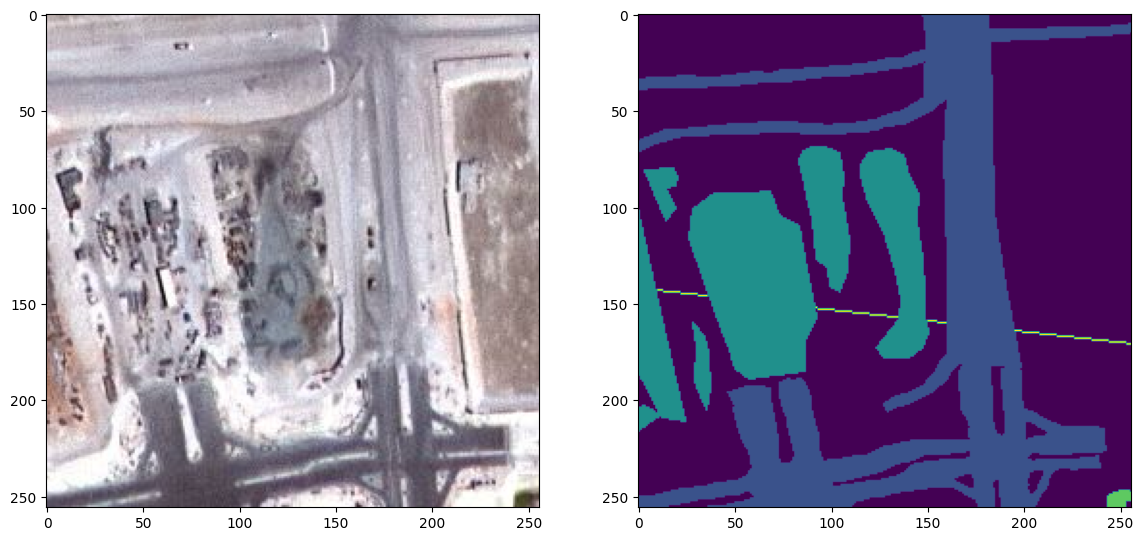

In [28]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8)) #width height
plt.subplot(121) #numRows numColumns Position
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])

In [29]:
total_classes = len(np.unique(labels))
print(total_classes)
print(labels[0,0,0])

6
[1]


In [30]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes)
print(labels_categorical_dataset.shape)
print(labels_categorical_dataset[0][0][0])


(945, 256, 256, 6)
[0. 1. 0. 0. 0. 0.]


In [31]:
master_training_dataset = image_dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.15,random_state=100)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [34]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[2]
total_classes = y_train.shape[3]


NameError: ignored